<a href="https://colab.research.google.com/github/pmargarete/CCADMACL_EXERCISES_COM222/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [17]:
target = housing.target

In [18]:
features = housing.data[["Longitude", "Latitude"]]

In [19]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [20]:
df = pd.concat([features, target])
df


,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

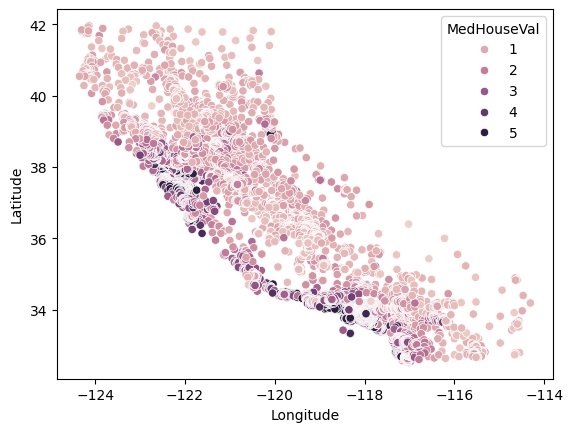

In [21]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [22]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-22-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-22-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [24]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

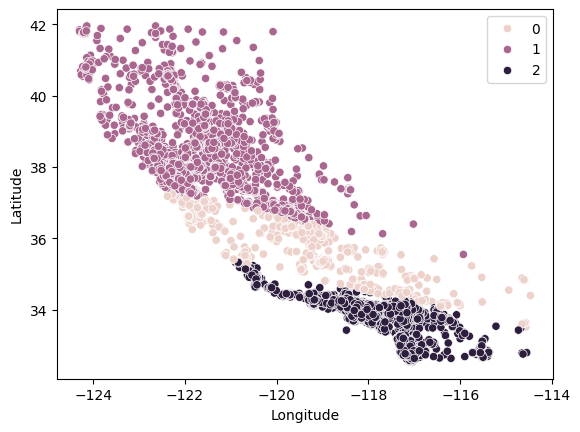

In [26]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

ELBOW METHOD

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

For cluster = 1, SSE/WCSS is 2.0690172605159725
For cluster = 2, SSE/WCSS is 0.8284275921346104
For cluster = 3, SSE/WCSS is 0.2896383867598299


Text(0, 0.5, 'WCSS')

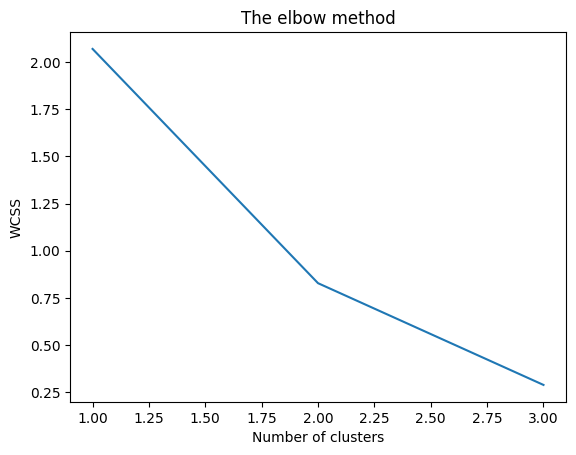

In [30]:
wcss=[]
sse = {}
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 3, random_state = 0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 4), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [31]:
import numpy as np

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(X_train_norm)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[0 1 2 ... 1 1 0]


{0: 7412, 1: 14899, 2: 5346}

K Means Output Cluster Frequency {0: 7412, 1: 14899, 2: 5346}
Silhouette Score for 3 Clusters 0.7952797607123016




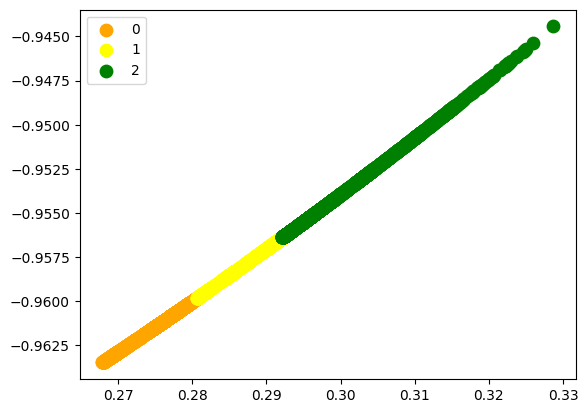

In [32]:
import numpy as np
from sklearn.metrics import silhouette_score
#print('Original Cluster Frequency',freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
print('K Means Output Cluster Frequency',dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters',silhouette_score(X_train_norm,pred_kmeans))
print("\n")

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

plt.scatter(X_train_norm[pred_kmeans == 0, 0], X_train_norm[pred_kmeans == 0, 1],
            s = 80, c = 'orange', label = '0')
plt.scatter(X_train_norm[pred_kmeans == 1, 0], X_train_norm[pred_kmeans == 1, 1],
            s = 80, c = 'yellow', label = '1')
plt.scatter(X_train_norm[pred_kmeans == 2, 0], X_train_norm[pred_kmeans == 2, 1],
            s = 80, c = 'green', label = '2')
plt.legend()
